In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
exercise = pd.read_csv('exercise.csv')

In [3]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
calories = pd.read_csv('calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
df=pd.merge(calories, exercise, on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
df['Duration']

0        29.0
1        14.0
2         5.0
3        13.0
4        10.0
         ... 
14995    11.0
14996     6.0
14997    16.0
14998     2.0
14999    18.0
Name: Duration, Length: 15000, dtype: float64

In [9]:
X = df['Duration'].values.reshape(-1, 1) 
y = df['Calories'].values.reshape(-1, 1) 

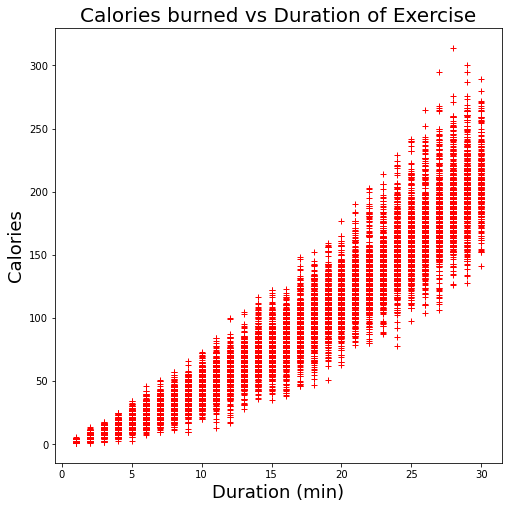

In [10]:
plt.figure(figsize=(8, 8))

plt.plot(X, y, 'r+');
plt.xlabel('Duration (min)', size = 18); plt.ylabel('Calories', size = 18); 
plt.title('Calories burned vs Duration of Exercise', size = 20);

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
print(regressor.intercept_)

[-21.91502931]


In [14]:
print(regressor.coef_)

[[7.17887263]]


In [15]:
y_pred = regressor.predict(X_test)

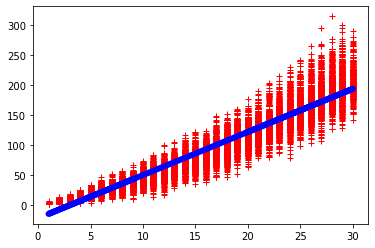

In [16]:
plt.plot(X, y, 'r+');
plt.plot(X_test, y_pred, color ='b',linewidth=6) 

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [17]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43.0,42.694824
1,15.0,21.158206
2,101.0,136.020169
3,186.0,186.272277
4,126.0,114.483551
...,...,...
2995,88.0,107.304678
2996,145.0,143.199041
2997,29.0,42.694824
2998,150.0,150.377914
